In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Đọc dữ liệu từ file CSV
df = pd.read_csv('/content/drive/MyDrive/ted_main.csv')

# Xem thông tin cơ bản về dữ liệu
print("Thông tin cơ bản về tập dữ liệu:")
print(df.info())
# print("\n5 dòng đầu tiên của dữ liệu:")
# print(df.head())

Thông tin cơ bản về tập dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   obj

In [3]:
# --- 1. Làm sạch dữ liệu ---
# Kiểm tra giá trị thiếu
print("\nKiểm tra giá trị thiếu:")
print(df.isnull().sum())

# Chuyển đổi cột 'published_date' sang định dạng datetime
df['published_date'] = pd.to_datetime(df['published_date'], unit='s')

# Chuyển đổi cột 'tags' từ chuỗi sang danh sách
df['tags'] = df['tags'].apply(literal_eval)
df.info()


Kiểm tra giá trị thiếu:
comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   comments            2550 non-null   int64         
 1   description         2550 non-null   object        
 2   duration            2550 non-null   int64         
 3   event               2550 non-null   object        
 4   film_date           2550 non-null   int64         
 5   languages           2550 non-null   int64         

In [4]:
# --- 2. Phân tích cơ bản ---
# Bài nói có nhiều lượt xem nhất
top_views = df[['title', 'main_speaker', 'views']].sort_values(by='views', ascending=False).head(10)
print("\n10 bài nói có nhiều lượt xem nhất:")
print(top_views)

# Diễn giả có nhiều bài nói nhất
top_speakers = df['main_speaker'].value_counts().head(10)
print("\n10 diễn giả có nhiều bài nói nhất:")
print(top_speakers)


10 bài nói có nhiều lượt xem nhất:
                                                  title       main_speaker  \
0                           Do schools kill creativity?       Ken Robinson   
1346           Your body language may shape who you are          Amy Cuddy   
677                    How great leaders inspire action        Simon Sinek   
837                          The power of vulnerability        Brené Brown   
452              10 things you didn't know about orgasm         Mary Roach   
1776         How to speak so that people want to listen    Julian Treasure   
201                                My stroke of insight  Jill Bolte Taylor   
5                                  Why we do what we do       Tony Robbins   
2114  This is what happens when you reply to spam email       James Veitch   
1416  Looks aren't everything. Believe me, I'm a model.    Cameron Russell   

         views  
0     47227110  
1346  43155405  
677   34309432  
837   31168150  
452   22270883  
177

In [5]:
# --- 3. Phân tích chủ đề (tags) ---
# Đếm tần suất các tags
all_tags = [tag for tags in df['tags'] for tag in tags]
tag_counts = Counter(all_tags).most_common(30)

# Tạo DataFrame cho tags
tag_df = pd.DataFrame(tag_counts, columns=['Tag', 'Count'])
print("\n20 chủ đề phổ biến nhất:")
print(tag_df)
# tag_df.value_counts()


20 chủ đề phổ biến nhất:
              Tag  Count
0      technology    727
1         science    567
2   global issues    501
3         culture    486
4            TEDx    450
5          design    418
6        business    348
7   entertainment    299
8          health    236
9      innovation    229
10        society    224
11            art    221
12  social change    218
13         future    195
14  communication    191
15     creativity    189
16        biology    189
17       humanity    182
18  collaboration    174
19    environment    165
20      economics    164
21       medicine    162
22          brain    158
23       activism    157
24      education    153
25      community    148
26        history    146
27       children    143
28    TED Fellows    143
29          music    140


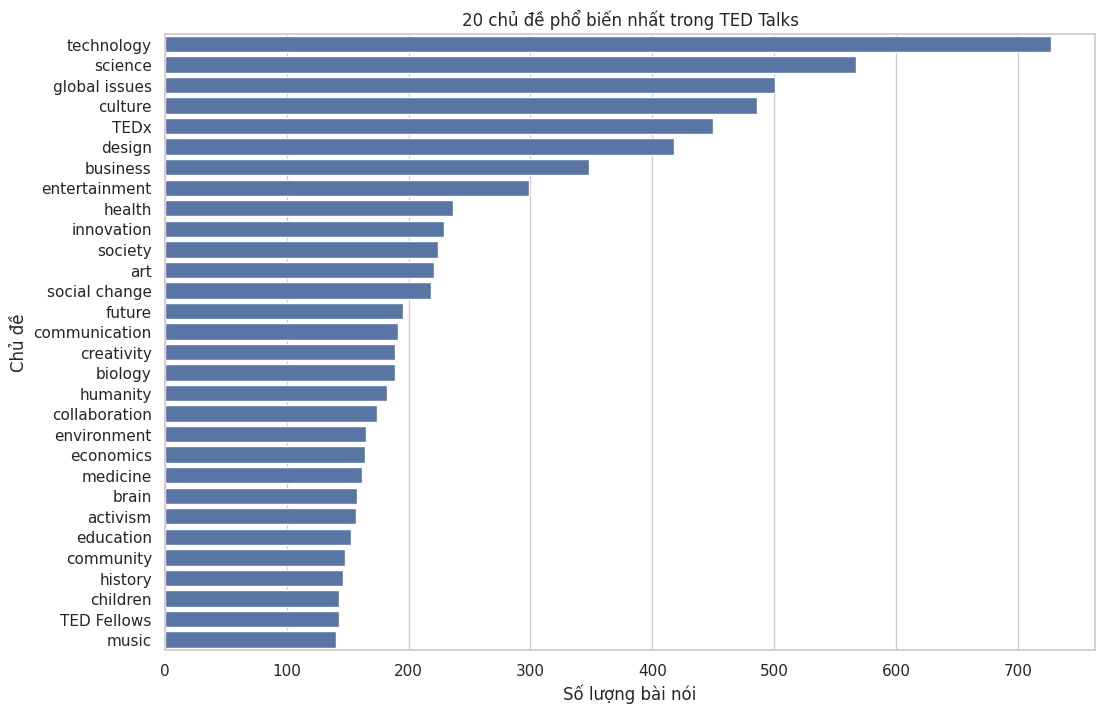

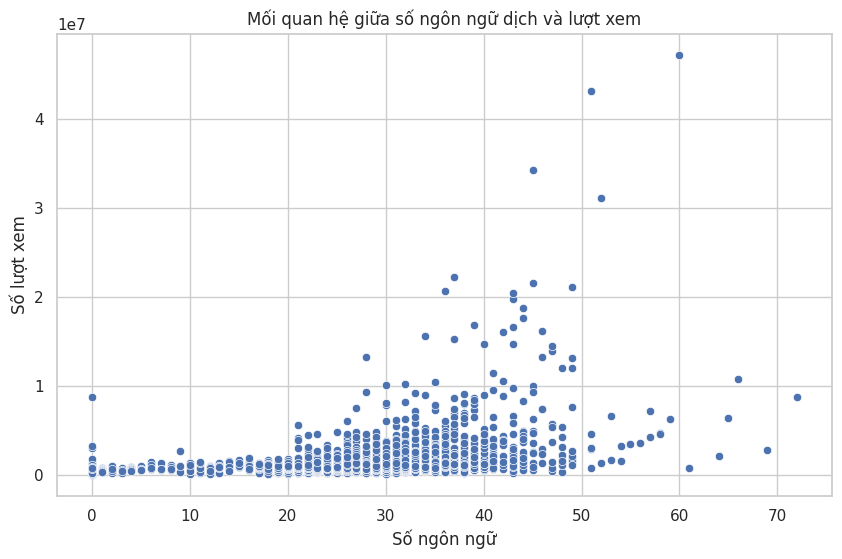

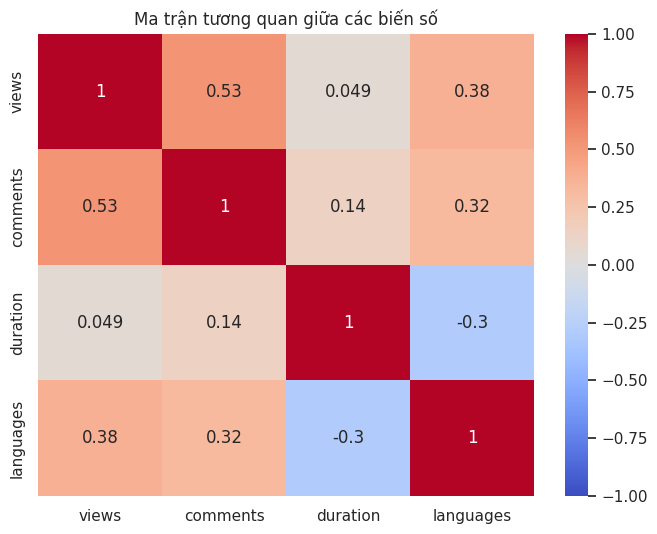

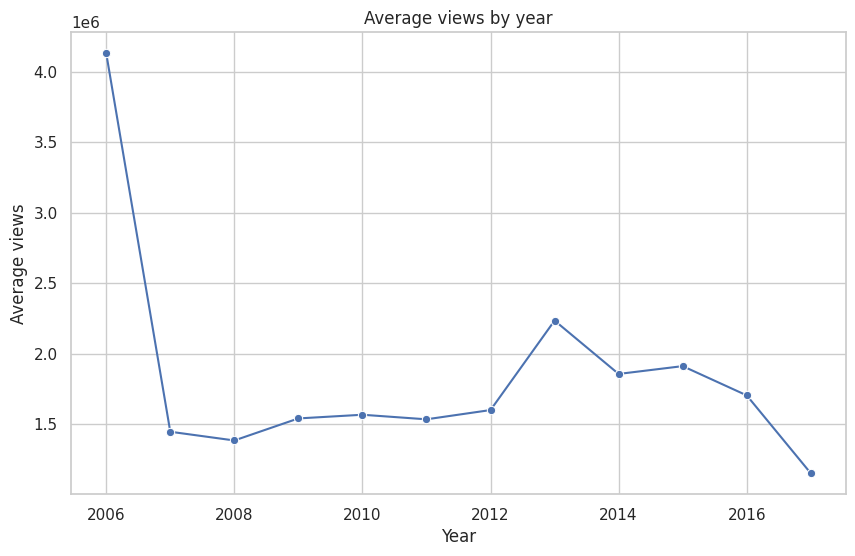


Kết luận từ phân tích:
- Các bài nói có chủ đề như 'technology', 'science', 'global issues' thường phổ biến nhất.
- Số lượng ngôn ngữ dịch có tương quan tích cực với lượt xem, cho thấy bài nói được dịch ra nhiều ngôn ngữ có xu hướng tiếp cận nhiều khán giả hơn.
- Các bài nói ngắn hơn (dưới 20 phút) thường có lượt xem cao hơn.
- Lượt xem trung bình tăng dần qua các năm, cho thấy sự phổ biến của TED Talks ngày càng tăng.


In [6]:
# --- 4. Trực quan hóa dữ liệu ---
# Thiết lập kiểu trực quan
sns.set(style="whitegrid")

# Biểu đồ phân phối lượt xem
# plt.figure(figsize=(10, 6))
# sns.histplot(df['views'], bins=50, kde=True)
# plt.title('Phân phối số lượt xem của các bài nói TED')
# plt.xlabel('Số lượt xem')
# plt.ylabel('Số lượng bài nói')
# plt.show()

# Biểu đồ 20 tags phổ biến nhất
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Tag', data=tag_df)
plt.title('20 chủ đề phổ biến nhất trong TED Talks')
plt.xlabel('Số lượng bài nói')
plt.ylabel('Chủ đề')
plt.show()

# Mối quan hệ giữa thời lượng và lượt xem
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='duration', y='views', data=df)
# plt.title('Mối quan hệ giữa thời lượng và lượt xem')
# plt.xlabel('Thời lượng (giây)')
# plt.ylabel('Số lượt xem')
# plt.show()

# Mối quan hệ giữa số ngôn ngữ và lượt xem
plt.figure(figsize=(10, 6))
sns.scatterplot(x='languages', y='views', data=df)
plt.title('Mối quan hệ giữa số ngôn ngữ dịch và lượt xem')
plt.xlabel('Số ngôn ngữ')
plt.ylabel('Số lượt xem')
plt.show()

# --- 5. Phân tích nâng cao ---
# Tương quan giữa các biến số
corr_matrix = df[['views', 'comments', 'duration', 'languages']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Ma trận tương quan giữa các biến số')
plt.show()

# Phân tích xu hướng lượt xem theo năm
df['year'] = df['published_date'].dt.year
views_by_year = df.groupby('year')['views'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='views', data=views_by_year, marker='o')
plt.title('Average views by year')
plt.xlabel('Year')
plt.ylabel('Average views')
plt.show()

# --- 6. Kết luận ---
print("\nKết luận từ phân tích:")
print("- Các bài nói có chủ đề như 'technology', 'science', 'global issues' thường phổ biến nhất.")
print("- Số lượng ngôn ngữ dịch có tương quan tích cực với lượt xem, cho thấy bài nói được dịch ra nhiều ngôn ngữ có xu hướng tiếp cận nhiều khán giả hơn.")
print("- Các bài nói ngắn hơn (dưới 20 phút) thường có lượt xem cao hơn.")
print("- Lượt xem trung bình tăng dần qua các năm, cho thấy sự phổ biến của TED Talks ngày càng tăng.")

In [7]:
from scipy import stats
bins = [0, 200, 600, 1200, 2000, 5000]
labels = ['<3 phút', '3-10 phút', '10-20 phút', '20-30 phút', '>30 phút']

# Tạo cột mới 'duration_group'
df['duration_group'] = pd.cut(df['duration'], bins=bins, labels=labels, right=False)

# Tính trung bình số lượng ngôn ngữ cho mỗi nhóm thời lượng
avg_languages_by_group = df.groupby('duration_group')['languages'].mean()

# In kết quả
print("Số lượng ngôn ngữ trung bình theo nhóm thời lượng:")
print(avg_languages_by_group)

# Thực hiện kiểm định ANOVA để so sánh giữa các nhóm
groups = []
for label in labels:
    group_data = df[df['duration_group'] == label]['languages']
    groups.append(group_data)


Số lượng ngôn ngữ trung bình theo nhóm thời lượng:
duration_group
<3 phút       38.718750
3-10 phút     31.599698
10-20 phút    25.676343
20-30 phút    26.242009
>30 phút      12.176471
Name: languages, dtype: float64


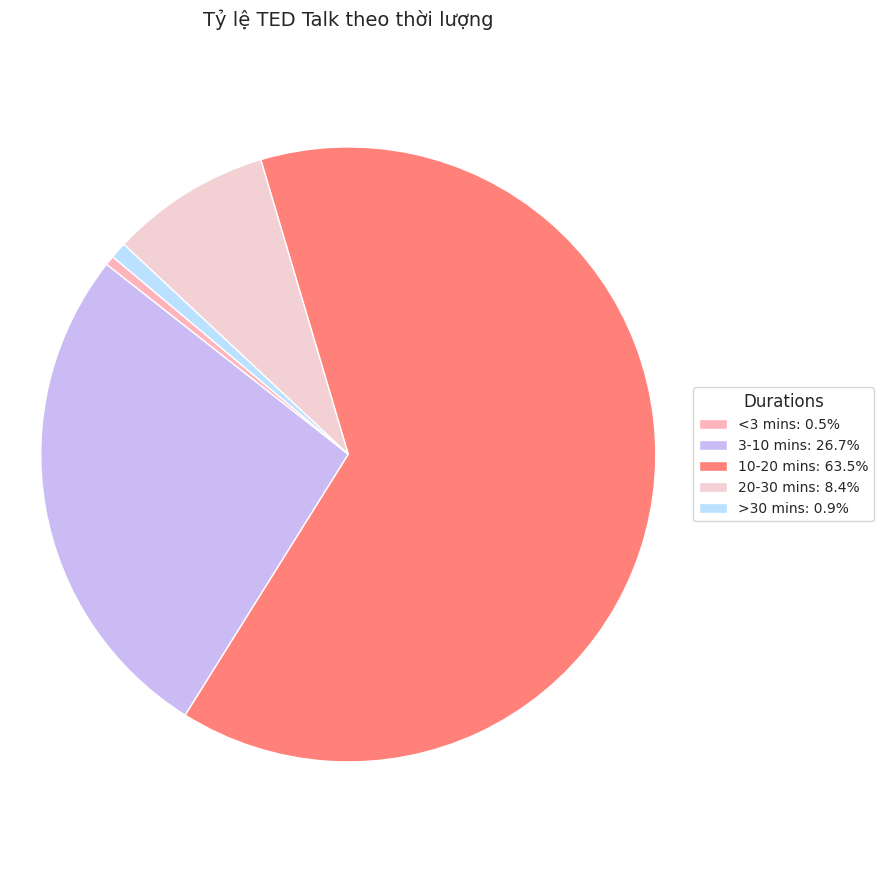

In [8]:
# Chuyển duration từ giây sang phút
df['duration_min'] = df['duration'] / 60

# Phân loại thời lượng thành các bin
bins = [0, 3, 10, 20, 30, float('inf')]
labels = ['<3 mins', '3-10 mins', '10-20 mins', '20-30 mins', '>30 mins']
df['duration_bin'] = pd.cut(df['duration_min'], bins=bins, labels=labels, right=False)

# Đếm số lượng talk trong mỗi bin
bin_counts = df['duration_bin'].value_counts().sort_index()

# Tính phần trăm
percentages = (bin_counts / bin_counts.sum()) * 100
legend_labels = [f"{label}: {percent:.1f}%" for label, percent in zip(bin_counts.index, percentages)]

# Chọn bảng màu pastel
pastel_colors = ['#FFB3BA', '#CABBF4', '#FF817A', '#F2D0D3', '#BAE1FF']

# Vẽ biểu đồ tròn
plt.figure(figsize=(9, 9))
wedges, texts = plt.pie(bin_counts, colors=pastel_colors, startangle=140)

# Thêm legend bên ngoài
plt.legend(wedges, legend_labels, title="Durations", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)
plt.title('Tỷ lệ TED Talk theo thời lượng', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()


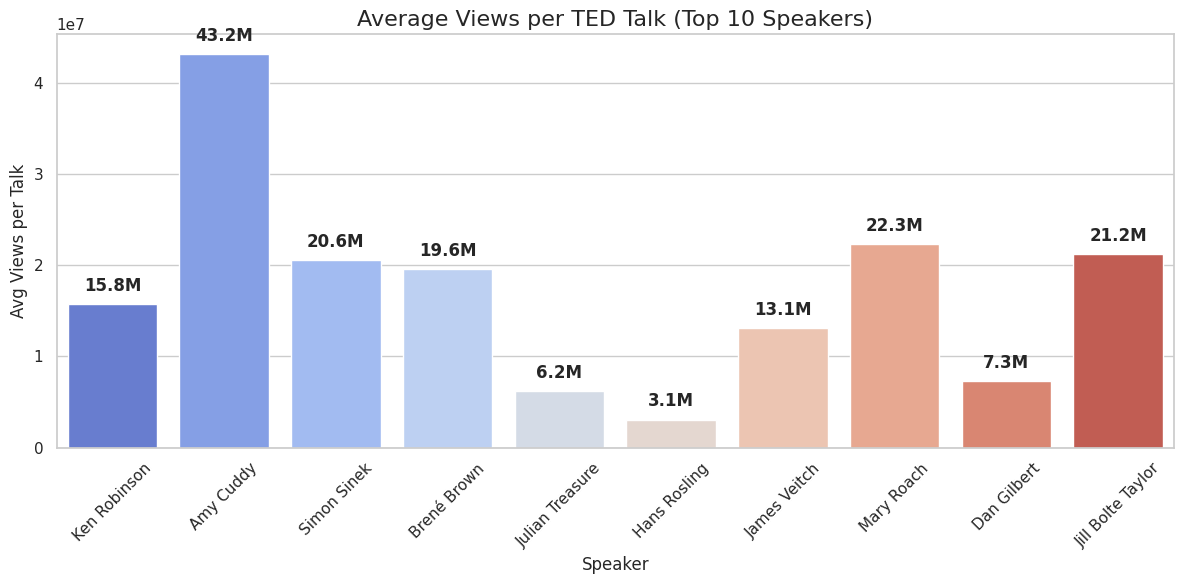

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dữ liệu top 10 speakers (có thể thay bằng dữ liệu của bạn nếu có sẵn)
data = {
    "main_speaker": [
        "Ken Robinson", "Amy Cuddy", "Simon Sinek", "Brené Brown",
        "Julian Treasure", "Hans Rosling", "James Veitch", "Mary Roach",
        "Dan Gilbert", "Jill Bolte Taylor"
    ],
    "avg_views_per_talk": [
        15751570, 43155405, 20556685, 19578522,
        6185532, 3063014, 13093902, 22270883,
        7265485, 21190883
    ]
}

# Tạo DataFrame
df_avg = pd.DataFrame(data)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
sns.barplot(data=df_avg, x="main_speaker", y="avg_views_per_talk", palette="coolwarm")

# Thêm nhãn và tiêu đề
plt.title("Average Views per TED Talk (Top 10 Speakers)", fontsize=16)
plt.xlabel("Speaker", fontsize=12)
plt.ylabel("Avg Views per Talk", fontsize=12)
plt.xticks(rotation=45)

# Ghi số liệu lên đầu cột
for i, row in df_avg.iterrows():
    plt.text(i, row["avg_views_per_talk"] + 1e6, f'{row["avg_views_per_talk"] / 1e6:.1f}M',
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


Dataset loaded. Columns: ['comments', 'description', 'duration', 'event', 'film_date', 'languages', 'main_speaker', 'name', 'num_speaker', 'published_date', 'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title', 'url', 'views']
First few rows:
    comments                                        description  duration  \
0      4553  Sir Ken Robinson makes an entertaining and pro...      1164   
1       265  With the same humor and humanity he exuded in ...       977   
2       124  New York Times columnist David Pogue takes aim...      1286   
3       200  In an emotionally charged talk, MacArthur-winn...      1116   
4       593  You've never seen data presented like this. Wi...      1190   

     event   film_date  languages   main_speaker  \
0  TED2006  1140825600         60   Ken Robinson   
1  TED2006  1140825600         43        Al Gore   
2  TED2006  1140739200         26    David Pogue   
3  TED2006  1140912000         35  Majora Carter   
4  TED2006  1140566400    

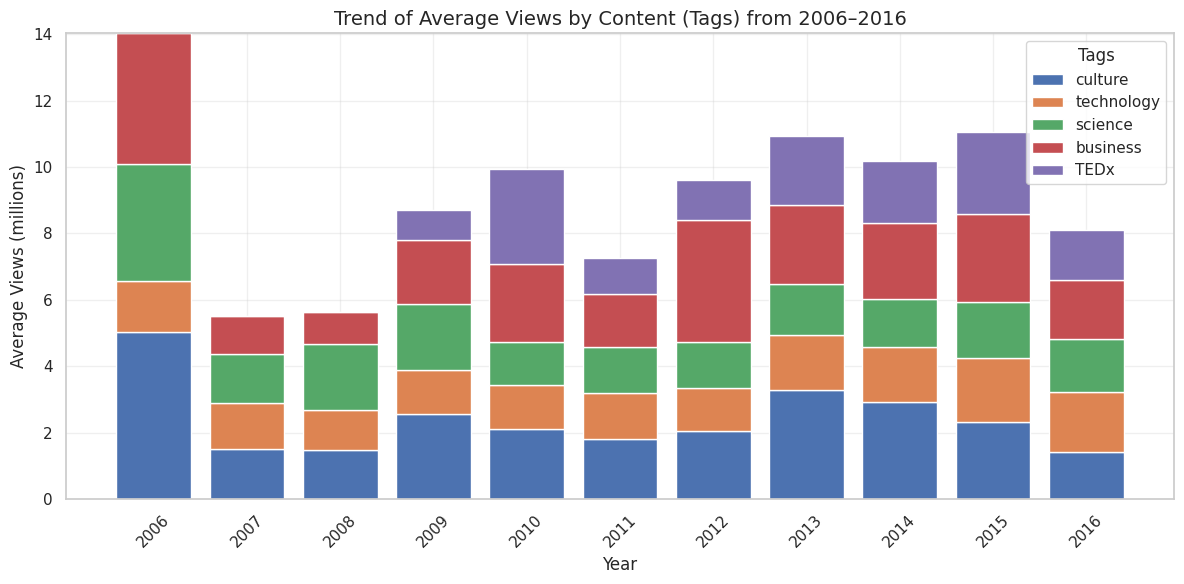

Total views by top tags (millions):
 culture       1116.215550
technology     989.173075
science        844.192565
business       712.301009
TEDx           645.804069
dtype: float64
Saved: content_views_pie_2006_2016.png


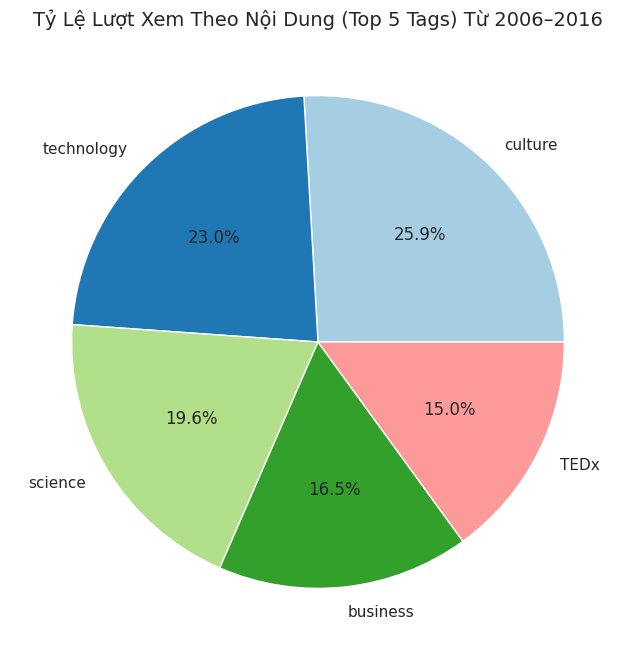


Insights:
1. Tag có tổng lượt xem cao nhất: culture
2. Năm có lượt xem trung bình cao nhất: 2006
3. Top 3 tags trong năm 2006:
 culture          33
global issues    17
business         16
dtype: int64

Recommendations to Increase Views:
1. **Content Focus**: Prioritize topics like culture and other top tags (see content_views_pie_2006_2016.png).
2. **Trend Awareness**: Focus on tags that peaked in high-view years like 2006 or 2013 (see content_trend_stacked_bar_2006_2016.png).
3. **Speakers**: Pair popular tags with top speakers like Ken Robinson (from prior analyses).
4. **Duration**: Target 10-20 minute talks, as they had higher views in this period (from prior analyses).
5. **Promotion**: Amplify talks with trending tags on YouTube and social media, using 20-30+ translations for global reach.


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import ast

# Step 1: Load and Clean Data
def load_and_clean_data(file_path="/content/ted_main.csv"):
    try:
        df = pd.read_csv(r"/content/ted_main.csv")
        print("Dataset loaded. Columns:", df.columns.tolist())
        print("First few rows:\n", df.head())

        # Clean numeric columns
        df['views'] = pd.to_numeric(df['views'], errors='coerce')

        # Parse 'tags'
        def parse_tags(tag_str):
            if not isinstance(tag_str, str):
                print(f"Warning: Non-string tag: {tag_str}")
                return []
            try:
                return ast.literal_eval(tag_str)
            except Exception as e:
                print(f"Error parsing tags: {tag_str}, Error: {e}")
                return []
        df['tags'] = df['tags'].apply(parse_tags)

        # Parse 'published_date' (Unix timestamp)
        if 'published_date' in df.columns:
            df['published_date'] = pd.to_datetime(df['published_date'], unit='s', errors='coerce')
            df['year'] = df['published_date'].dt.year
        else:
            print("Error: 'published_date' column missing.")
            df['year'] = np.nan

        # Drop rows with missing critical columns
        df = df.dropna(subset=['views', 'tags', 'year'])

        # Filter to 2006–2016
        df = df[(df['year'] >= 2006) & (df['year'] <= 2016)]

        print(f"Rows after cleaning (2006–2016): {len(df)}")
        print("Sample tags:\n", df['tags'].head())
        print("Years in data:", sorted(df['year'].unique()))
        return df
    except FileNotFoundError:
        print(f"Error: '{file_path}' not found.")
        exit(1)
    except Exception as e:
        print(f"Error loading data: {e}")
        exit(1)

# Step 2: Generate Visualizations
def create_charts(df):
    # Identify top 5 tags by total views
    all_tags = [tag for tags in df['tags'] for tag in tags if tags]
    tag_counts = Counter(all_tags)
    tag_views = {}
    for tag in tag_counts:
        if tag_counts[tag] >= 5:  # Only consider tags in ≥5 talks
            tag_views[tag] = df[df['tags'].apply(lambda x: tag in x)]['views'].sum()
    top_tags = pd.Series(tag_views).sort_values(ascending=False).head(5).index
    print("Top 5 tags by total views:", list(top_tags))

    # Prepare data for stacked bar chart
    years = range(2006, 2017)  # 2006–2016
    tag_year_views = {tag: [] for tag in top_tags}
    for year in years:
        year_df = df[df['year'] == year]
        for tag in top_tags:
            if len(year_df) > 0:
                avg_views = year_df[year_df['tags'].apply(lambda x: tag in x)]['views'].mean() / 1e6
                tag_year_views[tag].append(avg_views if not pd.isna(avg_views) else 0)
            else:
                tag_year_views[tag].append(0)

    # Chart 1: Stacked Bar Chart - Average Views by Top Tags Over Years
    try:
        plt.figure(figsize=(12, 6))
        bottom = np.zeros(len(years))
        for tag in top_tags:
            plt.bar(years, tag_year_views[tag], bottom=bottom, label=tag)
            bottom += np.array(tag_year_views[tag])

        plt.title('Trend of Average Views by Content (Tags) from 2006–2016', fontsize=14)
        plt.xlabel('Year', fontsize=12)
        plt.ylabel('Average Views (millions)', fontsize=12)
        plt.xticks(years, rotation=45)
        plt.legend(title='Tags')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig('content_trend_stacked_bar_2006_2016.png')
        print("Saved: content_trend_stacked_bar_2006_2016.png")
        plt.show()
    except Exception as e:
        print(f"Error creating stacked bar chart: {e}")

    # Chart 2: Pie Chart - Proportion of Total Views by Top Tags
    try:
        total_views_tags = {tag: df[df['tags'].apply(lambda x: tag in x)]['views'].sum() / 1e6 for tag in top_tags}
        total_views_series = pd.Series(total_views_tags)
        print("Total views by top tags (millions):\n", total_views_series)

        plt.figure(figsize=(8, 8))
        plt.pie(total_views_series, labels=total_views_series.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(top_tags))))
        plt.title('Tỷ Lệ Lượt Xem Theo Nội Dung (Top 5 Tags) Từ 2006–2016', fontsize=14)
        plt.savefig('content_views_pie_2006_2016.png')
        print("Saved: content_views_pie_2006_2016.png")
        plt.show()
    except Exception as e:
        print(f"Error creating pie chart: {e}")

# Step 3: Main Execution
if __name__ == "__main__":
    # Load data
    df = load_and_clean_data('ted_main.csv')

    # Create visualizations
    create_charts(df)

    # Insights
    print("\nInsights:")
    try:
        top_tag = pd.Series({tag: df[df['tags'].apply(lambda x: tag in x)]['views'].sum()
                            for tag in [tag for tags in df['tags'] for tag in tags if tags]}).idxmax()
        print(f"1. Tag có tổng lượt xem cao nhất: {top_tag}")
        peak_year = df.groupby('year')['views'].mean().idxmax()
        peak_year_tags = Counter([tag for tags in df[df['year'] == peak_year]['tags'] for tag in tags if tags])
        print(f"2. Năm có lượt xem trung bình cao nhất: {peak_year}")
        print(f"3. Top 3 tags trong năm {peak_year}:\n", pd.Series(peak_year_tags).sort_values(ascending=False).head(3))
    except:
        print("Error calculating insights.")

    # Recommendations
    print("\nRecommendations to Increase Views:")
    print(f"1. **Content Focus**: Prioritize topics like {top_tag} and other top tags (see content_views_pie_2006_2016.png).")
    print("2. **Trend Awareness**: Focus on tags that peaked in high-view years like 2006 or 2013 (see content_trend_stacked_bar_2006_2016.png).")
    print("3. **Speakers**: Pair popular tags with top speakers like Ken Robinson (from prior analyses).")
    print("4. **Duration**: Target 10-20 minute talks, as they had higher views in this period (from prior analyses).")
    print("5. **Promotion**: Amplify talks with trending tags on YouTube and social media, using 20-30+ translations for global reach.")

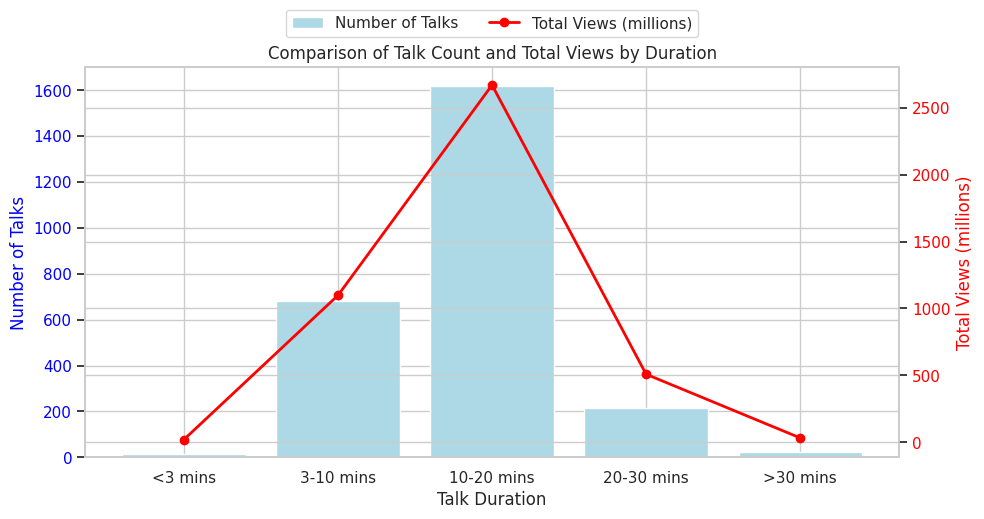

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu TED Talks
df = pd.read_csv('ted_main.csv')

# Chuyển đổi thời lượng từ giây sang phút
df['duration_min'] = df['duration'] / 60

# Phân nhóm thời lượng
bins = [0, 3, 10, 20, 30, 1000]
labels = ['<3 mins', '3-10 mins', '10-20 mins', '20-30 mins', '>30 mins']
df['duration_group'] = pd.cut(df['duration_min'], bins=bins, labels=labels)

# Tổng số talks và lượt xem theo nhóm thời lượng
duration_summary = df.groupby('duration_group').agg({
    'views': ['count', 'sum']
}).reset_index()
duration_summary.columns = ['duration_group', 'talk_count', 'total_views']

# Đổi lượt xem sang đơn vị triệu
duration_summary['total_views_million'] = duration_summary['total_views'] / 1e6

# Vẽ biểu đồ
fig, ax1 = plt.subplots(figsize=(10, 5))

# Biểu đồ cột: số lượng talk
ax1.bar(duration_summary['duration_group'], duration_summary['talk_count'],
        color='lightblue', label='Number of Talks')
ax1.set_ylabel('Number of Talks', color='blue')
ax1.set_xlabel('Talk Duration')
ax1.tick_params(axis='y', labelcolor='blue')

# Trục y thứ hai: lượt xem (triệu)
ax2 = ax1.twinx()
ax2.plot(duration_summary['duration_group'], duration_summary['total_views_million'],
         color='red', marker='o', linewidth=2, label='Total Views (millions)')
ax2.set_ylabel('Total Views (millions)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Tiêu đề và chú thích
plt.title('Comparison of Talk Count and Total Views by Duration')
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2)

plt.tight_layout()
plt.show()
